# Demo Notebook for the vivainsights Python package

Welcome to the comprehensive demo of the **vivainsights** Python package! This notebook showcases the full analytical capabilities available for Microsoft Viva Insights data analysis.

**vivainsights** is a powerful Python library designed to help you:
- 📊 **Visualize** collaboration patterns and organizational metrics
- 🔍 **Analyze** employee engagement and wellbeing indicators  
- 📈 **Identify** trends, outliers, and areas for improvement
- 🌐 **Explore** collaboration networks and organizational dynamics
- ⚡ **Generate** actionable insights for leaders and HR teams

This demo covers the major function categories with real examples using sample Person Query data.

For more information about the package:
- [📚 Documentation](https://microsoft.github.io/vivainsights-py/) - Complete API reference and guides
- [💻 GitHub Repository](https://github.com/microsoft/vivainsights-py/) - Source code and issue tracking
- [🎯 Use Cases](https://microsoft.github.io/vivainsights-py/about.html) - Real-world applications and examples

## Getting Started: Loading Data and Libraries

The **vivainsights** package comes with built-in sample datasets that mirror the structure of real Viva Insights exports. The `load_pq_data()` function loads a representative Person Query dataset containing:

- **Individual metrics**: Collaboration hours, email activity, meeting patterns
- **Organizational attributes**: Function, level, organization, manager status  
- **Time series data**: Weekly observations for trend analysis
- **Network data**: Collaboration patterns across the organization

Let's start by loading the library and exploring the sample data:

In [34]:
import vivainsights as vi

# load in-built datasets
pq_data = vi.load_pq_data() # load and assign in-built person query

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
pq_data.head()

,PersonId,MetricDate,Collaboration_hours,Copilot_actions_taken_in_Teams,Meeting_and_call_hours,Internal_network_size,Email_hours,Channel_message_posts,Conflicting_meeting_hours,Large_and_long_meeting_hours,...,Summarise_chat_actions_taken_using_Copilot_in_Teams,Summarise_email_thread_actions_taken_using_Copilot_in_Outlook,Summarise_meeting_actions_taken_using_Copilot_in_Teams,Summarise_presentation_actions_taken_using_Copilot_in_PowerPoint,Summarise_Word_document_actions_taken_using_Copilot_in_Word,FunctionType,SupervisorIndicator,Level,Organization,LevelDesignation
0,bf361ad4-fc29-432f-95f3-837e689f4ac4,2024-03-31,17.452987,4,11.767599,92,7.523189,0.753451,2.079210,0.635489,...,2,0,0,0,0,Specialist,Manager,Level3,IT,Senior IC
1,0500f22c-2910-4154-b6e2-66864898d848,2024-03-31,32.860820,6,26.743370,193,11.578396,0.000000,8.106997,1.402567,...,2,0,4,1,0,Specialist,Manager,Level2,Legal,Senior Manager
2,bb495ec9-8577-468a-8b48-e32677442f51,2024-03-31,21.502359,8,13.982031,113,9.073214,0.894786,3.001401,0.000192,...,1,1,0,0,0,Manager,Manager,Level4,Legal,Junior IC
3,f6d58aaf-a2b2-42ab-868f-d7ac2e99788d,2024-03-31,25.416502,4,16.895513,131,10.281204,0.528731,1.846423,1.441596,...,0,0,0,0,0,Manager,Manager,Level1,HR,Executive
4,c81cb49a-aa27-4cfc-8211-4087b733a3c6,2024-03-31,11.433377,4,6.957468,75,5.510535,2.288934,0.474048,0.269996,...,0,0,1,0,0,Technician,Manager,Level1,Finance,Executive


## Core Visualization Functions

The **vivainsights** package provides a comprehensive suite of visualization functions, each designed for specific analytical needs. All visualization functions follow a consistent pattern:

**Key Parameters:**
- `data` - Your Viva Insights dataset (Person Query, Meeting Query, etc.)
- `metric` - The collaboration metric to analyze (e.g., 'Collaboration_hours', 'Emails_sent')
- `hrvar` - Organizational grouping variable (e.g., 'Organization', 'LevelDesignation')  
- `mingroup` - Minimum group size to display (privacy protection)
- `return_type` - Output format: `'plot'` (visualization) or `'table'` (summary data)

### Bar Charts: Comparing Groups

The `create_bar()` function creates person-averaged bar charts - it first calculates individual averages, then group averages. This prevents larger groups from dominating the analysis and ensures fair comparison across organizational segments.

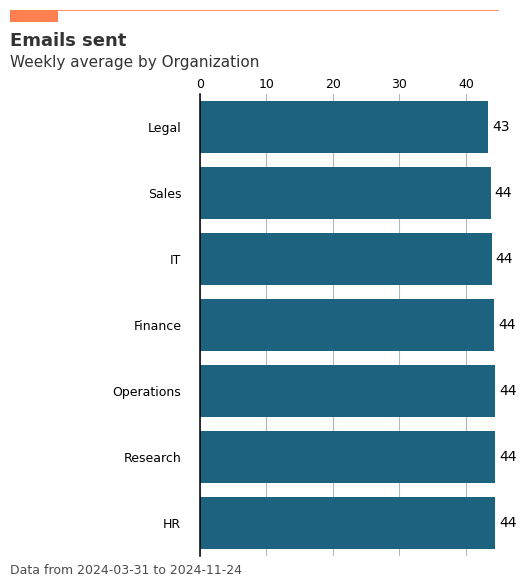

In [37]:
plot_bar = vi.create_bar(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5)

You can also ask the function to return a summary table by specifying the parameter `return_type`. This summary table can be copied to a clipboard with `export()`.

In [38]:
tb = vi.create_bar(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='table')
print(tb)

  Organization     metric   n
1           HR  44.423377  33
5     Research  44.364859  52
4   Operations  44.345455  22
0      Finance  44.213445  68
2           IT  43.871867  68
6        Sales  43.723077  13
3        Legal  43.328571  44


In [39]:
vi.export(tb)

Data frame copied to clipboard.
You may paste the contents directly to Excel.


()

Here are some other visual outputs, and their accompanying summary table outputs:

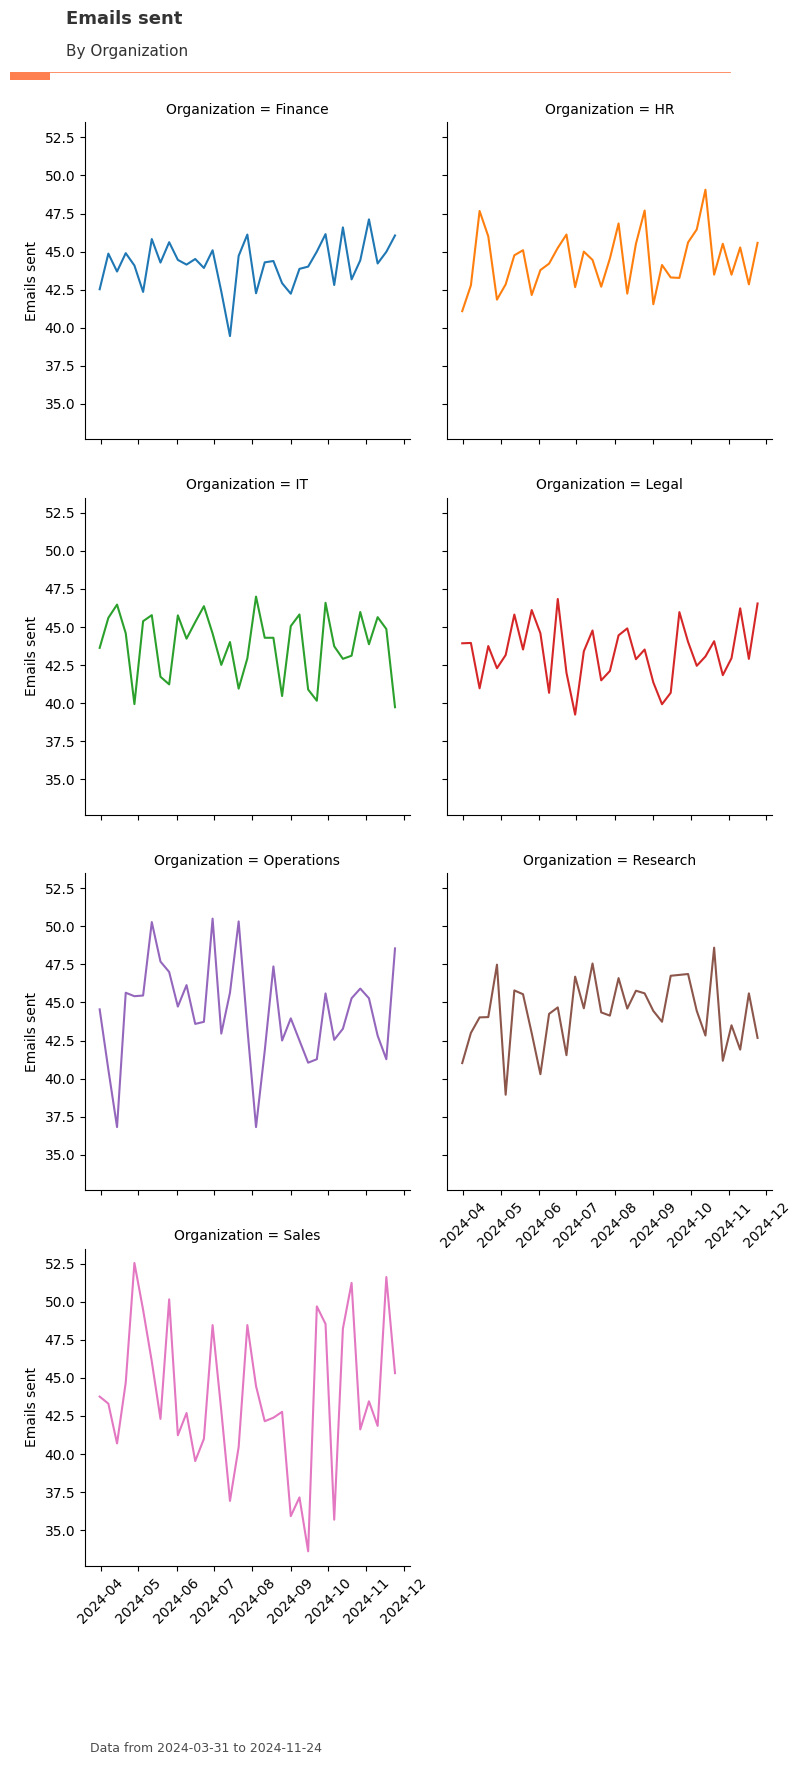

In [40]:
plot_line = vi.create_line(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='plot')

In [41]:
vi.create_line(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='table').head()

,MetricDate,Organization,metric,n
0,2024-03-31,Finance,42.529412,68
1,2024-03-31,HR,41.090909,33
2,2024-03-31,IT,43.632353,68
3,2024-03-31,Legal,43.931818,44
4,2024-03-31,Operations,44.545455,22


#### Distribution & Inequality Analysis

Understanding how metrics are distributed across your organization is crucial for identifying patterns, outliers, and inequality. The **vivainsights** package provides powerful functions for distribution analysis that go beyond simple averages.

**Distribution Functions:**
- `create_boxplot()` - Visualizes metric distributions and identifies outliers across groups
- `create_lorenz()` - Analyzes inequality using Lorenz curves and Gini coefficients

These functions are particularly valuable when analyzing engagement metrics. For example, while the average "Collaboration hours" might appear healthy across your organization, the distribution could reveal that a small group of employees are experiencing unsustainable collaboration loads, while others might be under-collaborating.

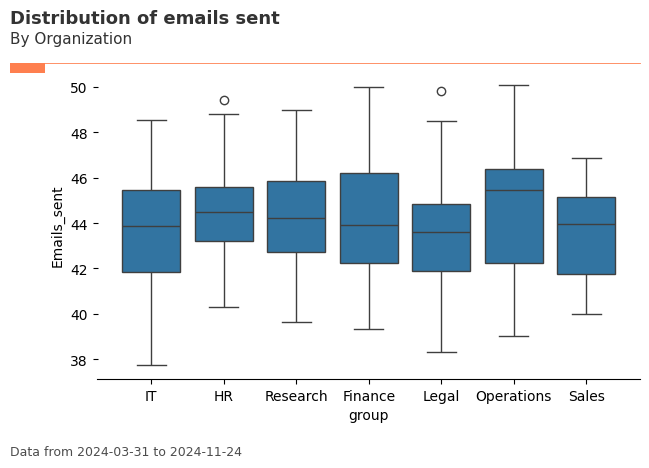

In [42]:
plot_box = vi.create_boxplot(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='plot')

In [43]:
vi.create_boxplot(data=pq_data, metric='Emails_sent', hrvar='Organization', mingroup=5, return_type='table')

,index,group,mean,median,sd,min,max,n
0,0,Finance,44.213445,43.900000,2.446053,39.342857,50.000000,68
1,1,HR,44.423377,44.485714,2.140707,40.314286,49.428571,33
2,2,IT,43.871867,43.885714,2.565453,37.742857,48.542857,68
3,3,Legal,43.328571,43.585714,2.434427,38.314286,49.828571,44
4,4,Operations,44.345455,45.442857,3.152513,39.000000,50.085714,22
5,5,Research,44.364859,44.228571,2.276114,39.657143,48.971429,52
6,6,Sales,43.723077,43.971429,2.132463,40.000000,46.885714,13


### Lorenz Curve: Analyzing Inequality

The `create_lorenz()` function helps you understand inequality within your data by plotting Lorenz curves and calculating Gini coefficients. This is particularly useful for identifying whether certain metrics are concentrated among a small subset of employees.

A Gini coefficient close to 0 indicates equality (everyone has similar values), while a value close to 1 indicates high inequality (few people have most of the value).

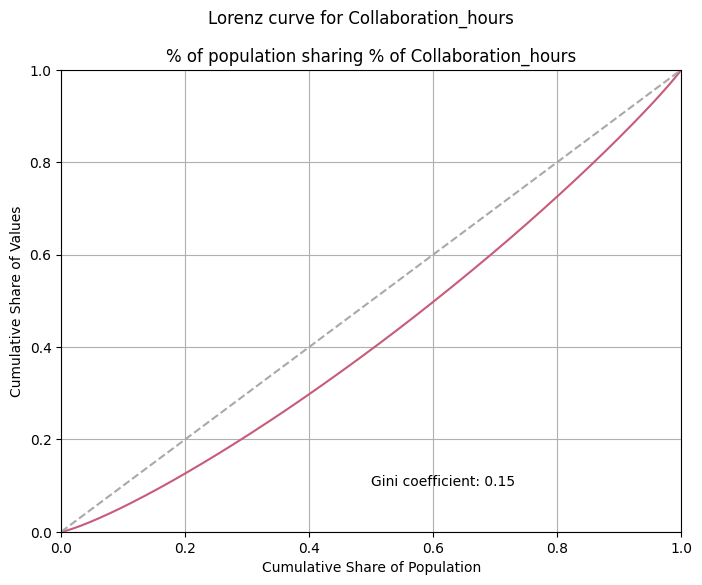

In [44]:
# Lorenz curve for collaboration hours - shows inequality across the population
lorenz_plot = vi.create_lorenz(data=pq_data, metric='Collaboration_hours', return_type='plot')

In [45]:
# Get the Gini coefficient to quantify inequality
gini_coef = vi.create_lorenz(data=pq_data, metric='Collaboration_hours', return_type='gini')
print(f"Gini coefficient for Collaboration Hours: {gini_coef:.3f}")
print(f"Interpretation: {'High inequality' if gini_coef > 0.5 else 'Moderate inequality' if gini_coef > 0.3 else 'Low inequality'}")

Gini coefficient for Collaboration Hours: 0.149
Interpretation: Low inequality


### Incidence Analysis: Understanding Thresholds

The `create_inc()` function helps you understand what percentage of your population exceeds certain thresholds for key metrics. This is crucial for identifying employees who might be at risk of burnout or disengagement.

For example, you might want to know what percentage of employees in each organization have collaboration hours above a healthy threshold.

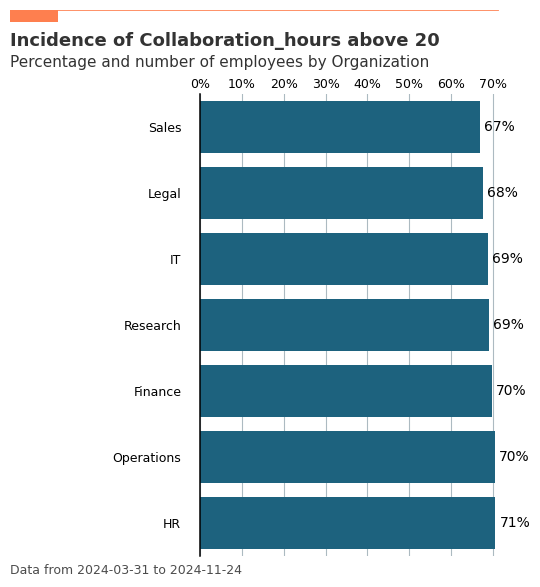

In [46]:
# Incidence analysis: What % of people have >20 collaboration hours per week?
inc_plot = vi.create_inc(
    data=pq_data,
    metric='Collaboration_hours',
    hrvar='Organization',
    threshold=20,  # Threshold of 20 hours per week
    position='above',  # Looking at people above this threshold
    mingroup=5,
    return_type='plot'
)

In [47]:
# Get the exact percentages as a table
inc_table = vi.create_inc(
    data=pq_data,
    metric='Collaboration_hours',
    hrvar='Organization',
    threshold=20,
    position='above',
    mingroup=5,
    return_type='table'
)
print("Percentage of employees with >20 collaboration hours per week:")
print(inc_table)

Percentage of employees with >20 collaboration hours per week:
  Organization    metric   n
1           HR  0.705628  33
4   Operations  0.703896  22
0      Finance  0.697059  68
5     Research  0.690659  52
2           IT  0.688235  68
3        Legal  0.676623  44
6        Sales  0.668132  13


## Exploratory Data Analysis

### Multi-dimensional Ranking: Finding Top Contributors and Risk Groups

The `create_rank()` function is one of the most powerful tools for rapid organizational exploration. It allows you to:

- **Compare multiple organizational dimensions** simultaneously
- **Identify top and bottom performers** across any metric  
- **Discover hidden patterns** in your organizational structure
- **Prioritize attention** by ranking all groups by importance

This function is particularly valuable for leadership teams who need to quickly understand where to focus their attention across complex organizational hierarchies.

In [48]:
vi.create_rank(
    data=pq_data,
    metric='Collaboration_hours',
    hrvar = ['Organization', 'FunctionType', 'LevelDesignation', 'SupervisorIndicator'],
    mingroup=5,
    return_type = 'table'
)

,hrvar,attributes,metric,n
4,FunctionType,Technician,23.426417,292
0,LevelDesignation,Executive,23.285180,37
0,FunctionType,Advisor,23.252294,299
1,Organization,HR,23.249373,33
4,Organization,Operations,23.225234,22
5,Organization,Research,23.187623,52
0,Organization,Finance,23.100312,68
3,FunctionType,Specialist,23.092292,300
2,LevelDesignation,Senior IC,23.092287,87
0,SupervisorIndicator,IC,23.065672,34


This can be visualized as well:

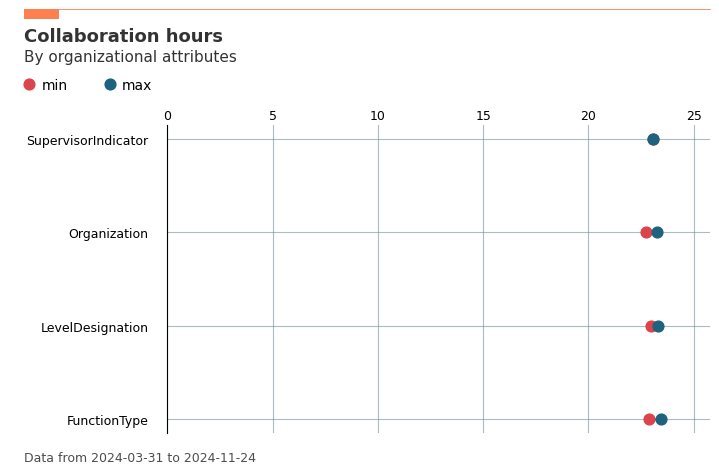

In [49]:
plot_rank = vi.create_rank(
    data=pq_data,
    metric='Collaboration_hours',
    hrvar = ['Organization', 'FunctionType', 'LevelDesignation', 'SupervisorIndicator'],
    mingroup=5,
    return_type = 'plot'
)

### Validating / exploring the data

Since HR variables or organizational attributes are a key part of the analysis process, it is also possible to perform some exploration or validation before we begin the analysis. 

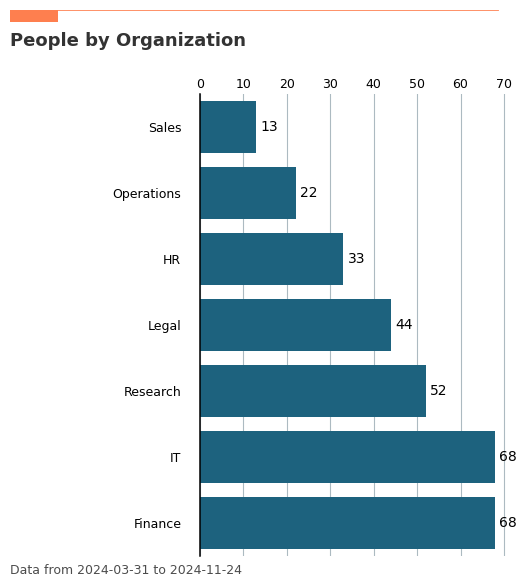

In [50]:
plot_hrcount = vi.hrvar_count(data=pq_data, hrvar='Organization', return_type='plot')

In [51]:
vi.hrvar_count(data=pq_data, hrvar='Organization', return_type='table')

,Organization,n
0,Finance,68
2,IT,68
5,Research,52
3,Legal,44
1,HR,33
4,Operations,22
6,Sales,13


## Additional Examples

Below are additional examples using the demo dataset `pq_data` for some of the newer functions in **vivainsights**.

### Bubble Plot: `create_bubble()`

The `create_bubble()` function visualizes the relationship between two metrics, with bubble size representing group size. This is useful for comparing two metrics across organizational groups.

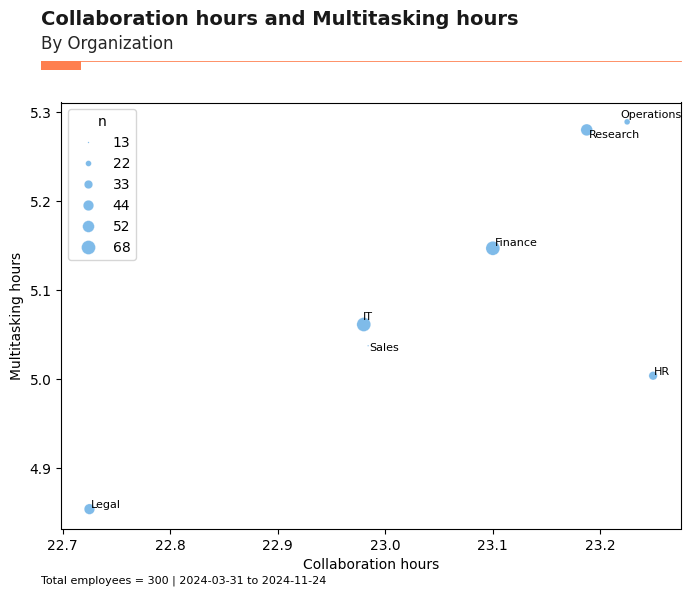

In [52]:
# Bubble plot: Collaboration_hours vs. Multitasking_hours by Organization
bubble_plot = vi.create_bubble(
    data=pq_data,
    metric_x="Collaboration_hours",
    metric_y="Multitasking_hours",
    hrvar="Organization",
    mingroup=5,
    return_type="plot"
)

### Trend Plot: `create_trend()`

The `create_trend()` function provides a week-by-week heatmap view of a selected metric, grouped by an HR attribute. This helps identify trends and hotspots over time.

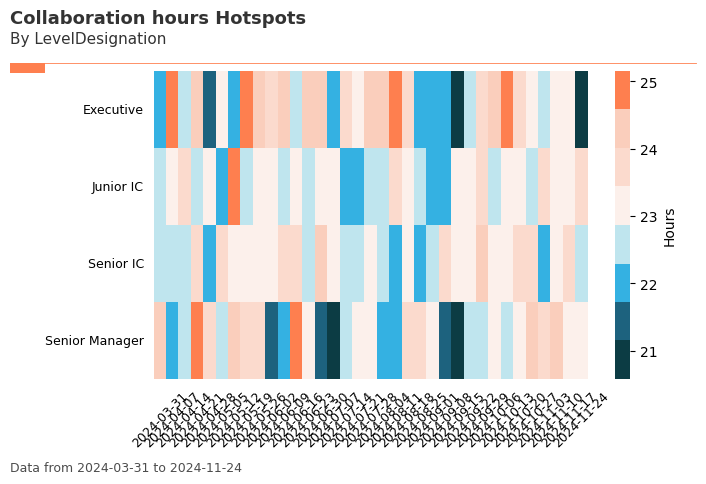

In [53]:
# Trend plot: Collaboration_hours by LevelDesignation
trend_plot = vi.create_trend(
    data=pq_data,
    metric="Collaboration_hours",
    hrvar="LevelDesignation",
    mingroup=5,
    return_type="plot"
)

### Key Metrics Scan: `keymetrics_scan()`

The `keymetrics_scan()` function summarizes multiple key metrics across a grouping variable, returning either a heatmap or a summary table. This is useful for a high-level scan of organizational health.

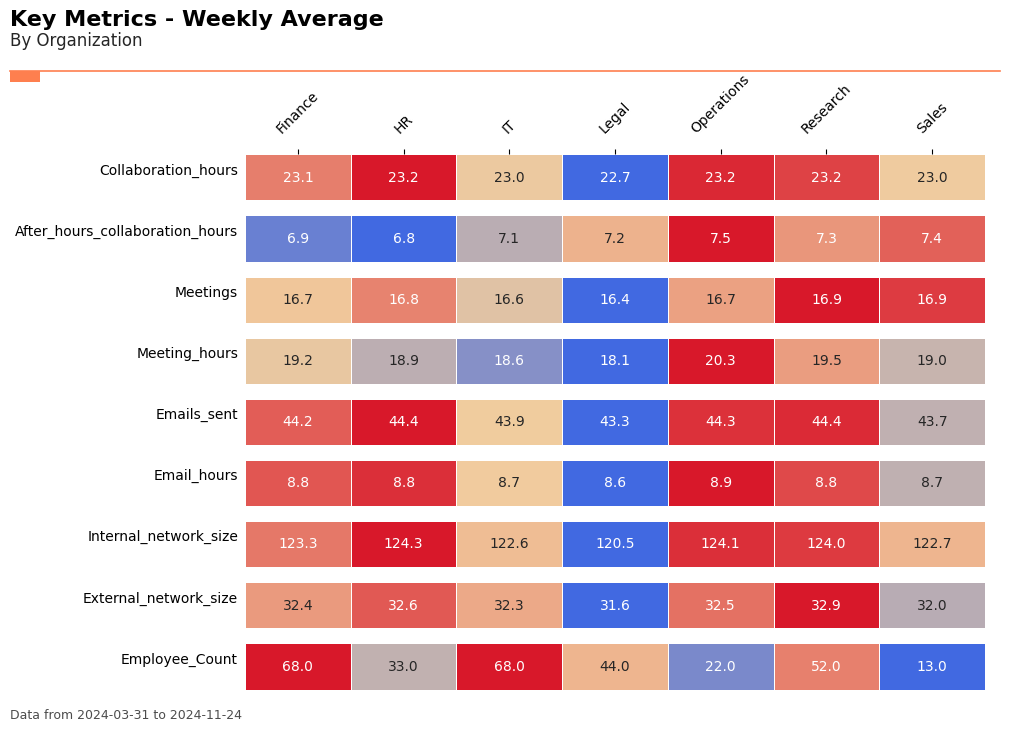

In [54]:
# Key metrics scan: heatmap by Organization
keymetrics_plot = vi.keymetrics_scan(
    data=pq_data,
    hrvar="Organization",
    mingroup=5,
    return_type="plot"
)

In [55]:
# Key metrics scan: summary table by Organization
keymetrics_table = vi.keymetrics_scan(
    data=pq_data,
    hrvar="Organization",
    mingroup=5,
    return_type="table"
)
keymetrics_table.head()

,Organization,Collaboration_hours,After_hours_collaboration_hours,Meetings,Meeting_hours,Emails_sent,Email_hours,Internal_network_size,External_network_size,Employee_Count
0,Finance,23.100312,6.917373,16.652941,19.172045,44.213445,8.818406,123.316807,32.385294,68
1,HR,23.249373,6.834921,16.757576,18.894323,44.423377,8.843827,124.337662,32.619913,33
2,IT,22.980218,7.079035,16.614569,18.561649,43.871867,8.743025,122.583193,32.331092,68
3,Legal,22.725075,7.239442,16.357143,18.121719,43.328571,8.627604,120.527922,31.561688,44
4,Operations,23.225234,7.540438,16.711688,20.339809,44.345455,8.858412,124.092208,32.531169,22


## Network Analysis & Flow Visualization

**vivainsights** includes powerful functions for analyzing collaboration networks and visualizing flows between organizational groups.

### Sankey Diagrams: Visualizing Organizational Flows

The `create_sankey()` function creates flow diagrams that show how people are distributed across different organizational attributes. This is particularly useful for understanding organizational structure and identifying potential silos.

In [56]:
# First, create a summary table for the Sankey diagram
# Sankey diagrams need aggregated data showing flows between two variables
sankey_data = pq_data.groupby(['Organization', 'LevelDesignation'])['PersonId'].nunique().reset_index(name='n')

# Create Sankey diagram showing flow from Organization to Level
sankey_plot = vi.create_sankey(
    data=sankey_data,
    var1='Organization',  # Left side of diagram
    var2='LevelDesignation',  # Right side of diagram  
    count='n'  # The flow volume
)

## Advanced Analytics

### Information Value Analysis: Predictive Insights

The `create_IV()` function helps you understand which organizational attributes are most predictive of key outcomes. This is particularly useful for identifying factors that drive engagement, performance, or retention.

Information Value (IV) measures the predictive strength of variables:
- IV < 0.02: Not useful for prediction
- 0.02 ≤ IV < 0.1: Weak predictive power  
- 0.1 ≤ IV < 0.3: Medium predictive power
- 0.3 ≤ IV < 0.5: Strong predictive power
- IV ≥ 0.5: Very strong (potentially suspicious)

In [58]:
# Information Value analysis: Which factors predict high collaboration?
# First, create a binary outcome variable for high collaboration (>median)
pq_data_iv = pq_data.copy()
# copilot_median = pq_data_iv['Copilot_actions_taken_in_Teams'].median()
# pq_data_iv['High_Copilot'] = (pq_data_iv['Copilot_actions_taken_in_Teams'] > copilot_median).astype(int)

pq_data_iv['Large_network'] = (pq_data_iv['Internal_network_size'] > 40).astype(int)

# Define predictor variables
predictors = ['Email_hours', 'Meeting_hours', 'Chat_hours']

# Run Information Value analysis
vi.create_IV(
    data=pq_data_iv,
    predictors=predictors,
    outcome='Large_network',
    return_type='plot'
)

ValueError: No predictors where the p-value lies below the significance level.

## Putting It All Together: Analysis Best Practices

The **vivainsights** package provides a comprehensive toolkit for organizational analytics. Here are some best practices for effective analysis:

### 1. Start with Exploration
- Use `create_rank()` and `keymetrics_scan()` to get a high-level overview
- Apply `hrvar_count()` to understand your population segments
- Check data quality with `identify_outlier()` and related functions

### 2. Dive Deep with Distribution Analysis  
- Use `create_boxplot()` to identify outliers and understand spread
- Apply `create_lorenz()` to assess inequality and concentration
- Leverage `create_inc()` to understand threshold exceedances

### 3. Understand Relationships
- Use `create_bubble()` to explore relationships between two metrics
- Apply `create_trend()` to identify patterns over time
- Visualize organizational flows with `create_sankey()`

### 4. Advanced Insights
- Use `create_IV()` for predictive analytics and identifying key drivers
- Apply network analysis functions for collaboration insights

### 5. Export and Share
- All functions support `return_type='table'` for extracting underlying data
- Use `export()` to copy tables to clipboard for easy sharing
- Combine multiple analyses to tell compelling data stories

This comprehensive approach ensures you can uncover meaningful insights about collaboration, engagement, and organizational health using Viva Insights data.